# Script reading ookla global dataset, filter Libyan data points and write to PostGIS.

To do:
- Run this for every month in Ookla's database
- Double check that libyan border does not exclude areas at the border (due to simplification of edges)
- Analyze timeseries
- Calculate aggregates
- Find hotspots/cold spots based on ookla data?
- Verify these are all mobile connections?

To download datasets via AWS SE CLI:
C:\Users\jneuj>aws s3 cp s3://ookla-open-data/shapefiles/performance/type=mobile/year=2020/quarter=2/2020-04-01_performance_mobile_tiles.zip test_ookla_joost.zip --no-sign-request

In [ ]:
# Script filtering Libyan measurements points out of Ookla's global open and monthly datasets
import geopandas as gpd
import psycopg2

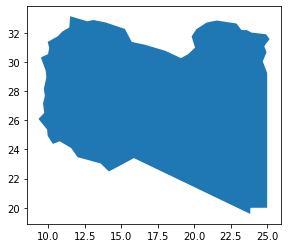

In [3]:
# Get polygon of Libya
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
libya = world[world.name == "Libya"]
libya.plot()

In [4]:
# Read points shapefile
points = gpd.read_file(r"D:\reach\data\test_ookla_joost\gps_mobile_tiles.shp", bbox = libya)
points.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,1220122303101132,20304,8170,22,14,6,"POLYGON ((13.26050 32.82883, 13.26599 32.82883..."
1,1220122301322001,9880,3881,25,52,18,"POLYGON ((13.18909 32.87959, 13.19458 32.87959..."
2,1220320102032201,3980,542,48,3,1,"POLYGON ((12.74963 26.60817, 12.75513 26.60817..."
3,1220303103113213,18157,9938,46,17,3,"POLYGON ((16.14441 29.16655, 16.14990 29.16655..."
4,1220303103131030,2654,12376,37,2,1,"POLYGON ((16.13892 29.14257, 16.14441 29.14257..."


In [5]:
# Add month attribute
points["month"] = '2020-04'

In [38]:
# Write data to postgis
conn = psycopg2.connect(dbname = "reach", port = 5432, user = 'joost', password = '1234567890', host ="37.59.233.104")
cur = conn.cursor()

conn.autocommit = False  ## Set true if problems?
conn.commit()

In [72]:
for  index, row in points.iterrows():
    sql = "INSERT INTO gis.ookla_open(quadkey, avg_d_kbps, avg_u_kbps, avg_lat_ms, tests, devices, geometry, month) VALUES({0},{1},{2},{3},{4},{5},ST_GeometryFromText('{6}', 4326),{7});".format(row.quadkey, row.avg_d_kbps, row.avg_u_kbps, row.avg_lat_ms, row.tests, row.devices, row.geometry, row.month )
    with conn.cursor() as cur:
        cur.execute(sql)
conn.commit()  #commit necessary? Maybe only if autocommit is true?

14
52
3
17
2
25
5
44
34
20
21
1
27
10
5
15
2
38
55
40
25
16
29
4
21
17
16
21
1
2
1
25
21
26
2
5
2
6
1
21
9
3
13
11
55
42
35
4
2
8
1
4
26
15
2
83
6
3
11
10
57
1
15
52
26
1
6
43
4
33
6
1
19
3
46
33
96
38
1
57
30
22
6
1
34
49
24
18
1
1
15
10
77
5
26
16
31
33
5
29
29
47
9
7
2
6
8
13
2
9
8
17
10
17
8
3
1
8
3
1
1
3
12
55
1
1
25
1
3
9
3
34
3
1
45
4
2
8
8
1
9
8
4
2
7
12
4
5
11
12
19
1
25
1
1
25
3
21
21
22
48
46
1
1
2
7
36
34
5
6
4
25
7
1
17
38
26
36
17
2
7
1
2
6
44
1
2
6
7
14
6
30
3
26
12
7
13
1
12
2
31
9
50
1
9
3
123
35
4
20
7
35
12
11
10
3
4
6
21
2
2
8
14
50
13
22
2
34
1
27
1
27
6
3
3
1
1
9
8
3
2
38
30
2
6
21
1
1
3
25
32
1
5
14
5
2
14
7
7
1
5
8
1
13
33
1
84
8
2
1
18
20
6
1
2
67
1
1
2
23
79
24
6
3
9
23
49
5
9
4
5
5
3
7
5
26
3
14
11
6
33
4
1
1
10
18
8
2
9
42
48
11
9
32
1
9
2
1
37
1
3
1
3
4
3
24
1
12
7
2
2
3
4
1
1
3
4
25
1
9
8
12
8
33
26
2
1
14
5
15
13
30
10
1
14
1
20
2
14
7
2
2
9
8
5
2
4
15
1
16
2
3
6
1
1
24
4
31
7
6
13
3
17
34
37
5
7
16
1
3
11
5
6
14
6
3
9
1
18
1
1
2
3
3
14
6
3
14
1
9
1
37
8
